In [1]:
import numpy as np
import matplotlib 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
spamreader = pd.read_csv("badabybadabu.csv")
unano = spamreader[spamreader["Year"]==2011]
x_obs=np.array(unano["Health_expenditure_per_capita_PPP"])
y_obs=np.array(unano["Years_Lived_With_Disability"])
sigma_y_obs = np.std(y_obs)

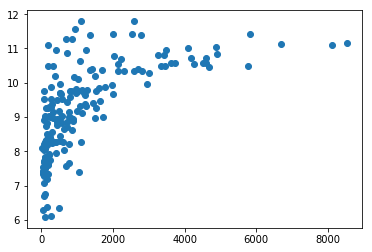

In [3]:
plt.scatter(x_obs,y_obs)

In [ ]:
#Definimos los modelos
def modelo(mode,x,a,b,c):
    if mode==1:
        return a*np.log(x)+b
    if mode ==2:
        return a*np.sqrt(x)+b
    if mode == 3:
         return a*x**2+b*x+c

#Definimos las likelihood
def loglikelihood(mode,x_obs, y_obs, sigma_y_obs, a, b):
    #Usando Chi cuadrado
    e = np.log(1/(np.sqrt(2*x_obs*np.pi)))
    e = e - x_obs/2
    return  e

#Definimos un prior
def logprior(a, b,c=0):
    p = np.random.random()
    if a > 0.4 and b>2 and c>=0:
        p = 0.0
    return p


N = 50000
#Listas del Modelo 1
lista_a1 = [np.random.random()]
lista_b1 = [np.random.random()+min(y_obs)]

#Listas del Modelo 2
lista_a2 = [np.random.random()]
lista_b2 = [np.random.random()+min(y_obs)]

#Lista del Modelo 3
lista_a = [np.random.random()]
lista_b = [np.random.random()+min(y_obs)]
lista_c = [np.random.random()]

logposterior1 = [loglikelihood(1,x_obs, y_obs, sigma_y_obs, lista_a1[0], lista_b1[0]) + logprior(lista_a1[0], lista_b1[0])]
logposterior2 = [loglikelihood(2,x_obs, y_obs, sigma_y_obs, lista_a2[0], lista_b2[0]) + logprior(lista_a2[0], lista_b2[0])]
logposterior =  [loglikelihood(3,x_obs, y_obs, sigma_y_obs, lista_a[0], lista_b[0]) + logprior(lista_a[0], lista_b[0], lista_c[0])]

#Los deltas de movimiento para cada modelo
sigma_delta_a1 = 0.1
sigma_delta_b1 = 0.5
sigma_delta_a2 = 0.05
sigma_delta_b2 = 0.5
sigma_delta_a = 0.1
sigma_delta_b = 0.1
sigma_delta_c = 1

for i in range(1,N):
    propuesta_a1  = lista_a1[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a1)
    propuesta_b1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b1)
    
    propuesta_a2  = lista_a2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a2)
    propuesta_b2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a2)

    propuesta_a  = lista_a[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_a)
    propuesta_b  = lista_b[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b)
    propuesta_c  = lista_c[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_c)

    
    logposterior_viejo1 = loglikelihood(1,x_obs, y_obs, sigma_y_obs, lista_a1[i-1], lista_b1[i-1]) + logprior(lista_a1[i-1], lista_b1[i-1])
    logposterior_nuevo1 = loglikelihood(1,x_obs, y_obs, sigma_y_obs, propuesta_a1, propuesta_b1) + logprior(propuesta_a1, propuesta_b1)
    
    logposterior_viejo2 = loglikelihood(2,x_obs, y_obs, sigma_y_obs, lista_a2[i-1], lista_b2[i-1]) + logprior(lista_a2[i-1], lista_b2[i-1])
    logposterior_nuevo2 = loglikelihood(2,x_obs, y_obs, sigma_y_obs, propuesta_a2, propuesta_b2) + logprior(propuesta_a2, propuesta_b2)
    
    logposterior_viejo = loglikelihood(3,x_obs, y_obs, sigma_y_obs, lista_a[i-1], lista_b[i-1]) + logprior(lista_a[i-1], lista_b[i-1], lista_c[i-1])
    logposterior_nuevo = loglikelihood(3,x_obs, y_obs, sigma_y_obs, propuesta_a, propuesta_b) + logprior(propuesta_a, propuesta_b, propuesta_c)

    
    r = 1-np.exp(logposterior_nuevo1[0]-logposterior_viejo1[0])
    
    r2 = 1-np.exp(logposterior_nuevo2[0]-logposterior_viejo2[0])

    r3 = 1-np.exp(logposterior_nuevo[0]-logposterior_viejo[0])
    
    if(0<r):
        lista_a1.append(propuesta_a1)
        lista_b1.append(propuesta_b1)
        logposterior1.append(logposterior_nuevo1)
    else:
        lista_a1.append(lista_a1[i-1])
        lista_b1.append(lista_b1[i-1])
        logposterior1.append(logposterior_viejo1) 
        
    if(0<r2):
        lista_a2.append(propuesta_a2)
        lista_b2.append(propuesta_b2)
        logposterior2.append(logposterior_nuevo2)
    else:
        lista_a2.append(lista_a2[i-1])
        lista_b2.append(lista_b2[i-1])
        logposterior2.append(logposterior_viejo2) 
        
    if(0<r3):
        lista_a.append(propuesta_a)
        lista_b.append(propuesta_b)
        lista_c.append(propuesta_c)
        logposterior.append(logposterior_nuevo)
    else:
        lista_a.append(lista_a[i-1])
        lista_b.append(lista_b[i-1])
        lista_c.append(lista_c[i-1])
        logposterior.append(logposterior_viejo) 
        
lista_a1 = np.array(lista_a1)
lista_b1 = np.array(lista_b1)
logposterior1 = np.array(logposterior1)

lista_a2 = np.array(lista_a2)
lista_b2 = np.array(lista_b2)
logposterior2 = np.array(logposterior2)

lista_a = np.array(lista_a)
lista_b = np.array(lista_b)
lista_c = np.array(lista_c)
logposterior = np.array(logposterior)

new_x = np.linspace(0,10000,100)
y_model1 = modelo(1,new_x,np.mean(lista_a1),np.mean(lista_b1),0)
y_model2 = modelo(2,new_x,np.mean(lista_a2),np.mean(lista_b2),0)
y_model3 = modelo(3,new_x,np.mean(lista_a2),np.mean(lista_b2), np.mean(lista_c))
plt.scatter(x_obs,y_obs)
plt.plot(new_x, y_model1)
plt.plot(new_x, y_model2)
plt.plot(new_x, y_model3)
print ('Usando Modelo 1',np.mean(lista_a1),np.mean(lista_b1))

print ('Usando Modelo 2',np.mean(lista_a2),np.mean(lista_b2))


In [ ]:
plt.scatter(x_obs,y_obs)
plt.plot(new_x, y_model1)
plt.plot(new_x, y_model2)
#plt.plot(new_x, y_model3)